In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
from os.path import join as pjoin

In [3]:
import obr
from functionaries import *
from time_functions import stamp_Ymd
from os_functions import verify_folder_existence
from IPython.display import clear_output

In [4]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [5]:
SOURCES_FOLDER = "mcnp_output\\"
FOLDER_TO_SAVE_IMAGES = pjoin('__images', stamp_Ymd())
verify_folder_existence(FOLDER_TO_SAVE_IMAGES)

# Энергетические спектры

In [6]:
names_temp = [('NP0a', 'PP0a'),
              ('NP5a',  'PP5a' ),
         ('NP10a', 'PP10a'),
         ('NP15a',  'PP15a' ),
         ('NP20a', 'PP20a'),
         ('NP25a',  'PP25a'),
         ('NP30a',  'PP30a' ),
         ('NP35a',  'PP35a' ),
         ('NP40a', 'PP40a'),
         ('NP45a',  'PP45a' ),
         ('NP50a',  'PP50a' )]
#names = names_temp
names = []
for name in names_temp:
    names.append((pjoin(SOURCES_FOLDER,name[0]), pjoin(SOURCES_FOLDER, name[1])))
names = np.array(names)
names

array([['mcnp_output\\NP0a', 'mcnp_output\\PP0a'],
       ['mcnp_output\\NP5a', 'mcnp_output\\PP5a'],
       ['mcnp_output\\NP10a', 'mcnp_output\\PP10a'],
       ['mcnp_output\\NP15a', 'mcnp_output\\PP15a'],
       ['mcnp_output\\NP20a', 'mcnp_output\\PP20a'],
       ['mcnp_output\\NP25a', 'mcnp_output\\PP25a'],
       ['mcnp_output\\NP30a', 'mcnp_output\\PP30a'],
       ['mcnp_output\\NP35a', 'mcnp_output\\PP35a'],
       ['mcnp_output\\NP40a', 'mcnp_output\\PP40a'],
       ['mcnp_output\\NP45a', 'mcnp_output\\PP45a'],
       ['mcnp_output\\NP50a', 'mcnp_output\\PP50a']], 
      dtype='|S17')

__images\20150504\back flow.spectrum.sample len = 5cm. mode = NP.png


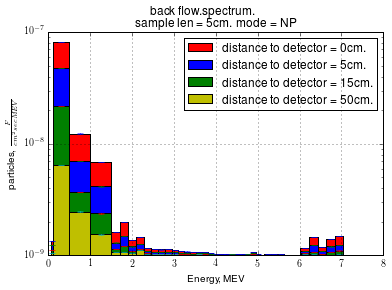

__images\20150504\back flow.spectrum.sample len = 5cm. mode = PP.png


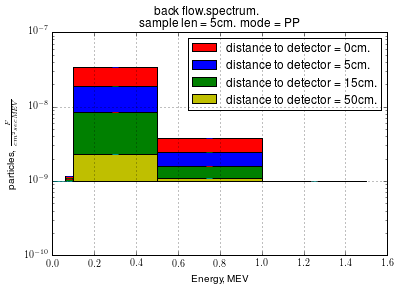

__images\20150504\back flow.spectrum.sample len = 5cm. mode = full.png


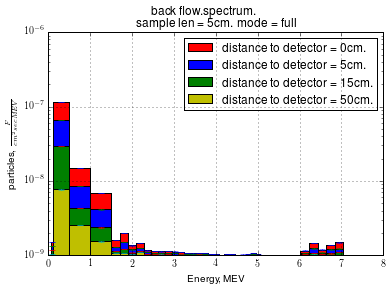

In [13]:
for name in names[:1]:
    plot_en_spectrums_in_back_going_flow(name[0],[0,5,15,50], ['red','blue','green','y'],pjoin(SOURCES_FOLDER, 'PP0a'),FOLDER_TO_SAVE_IMAGES)
    plot_en_spectrums_in_back_going_flow(name[1],[0,5,15,50], ['red','blue','green','y'],pjoin(SOURCES_FOLDER, 'PP0a'),FOLDER_TO_SAVE_IMAGES)
    plot_sum_en_spectrum_in_back_going_flow(name,[0,5,15,50], ['red','blue','green','y'],pjoin(SOURCES_FOLDER, 'PP0a'),FOLDER_TO_SAVE_IMAGES)
    clear_output(wait=True)

# Доза излучения в обратном потоке

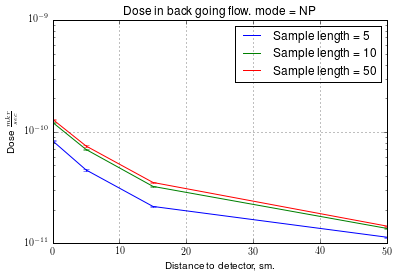

In [8]:
plot_dose_in_back_going_flow_for_each_file(names[:,0][[0,1,9]], [0,5,15,50], pjoin(SOURCES_FOLDER, 'PP0a'), FOLDER_TO_SAVE_IMAGES)

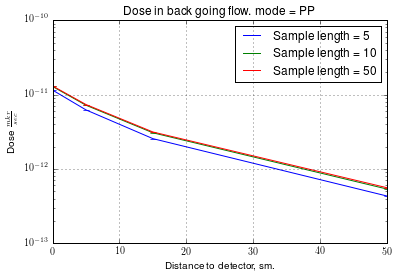

In [9]:
plot_dose_in_back_going_flow_for_each_file(names[:,1][[0,1,9]], [0,5,15,50], pjoin(SOURCES_FOLDER, 'PP0a'), FOLDER_TO_SAVE_IMAGES)

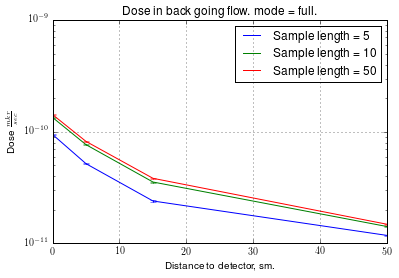

In [10]:
plot_full_dose_in_back_going_flow_for_each_file(names[[0,1,9]], [0,5,15,50], pjoin(SOURCES_FOLDER, 'PP0a'), FOLDER_TO_SAVE_IMAGES)

# Доза излучения за образцом.

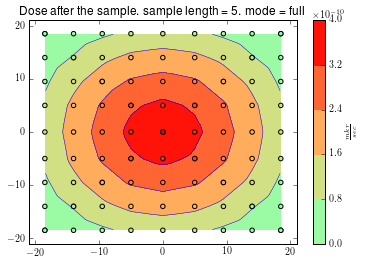

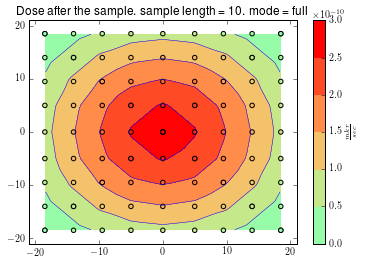

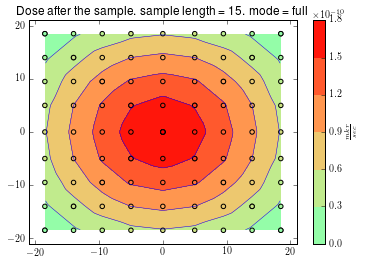

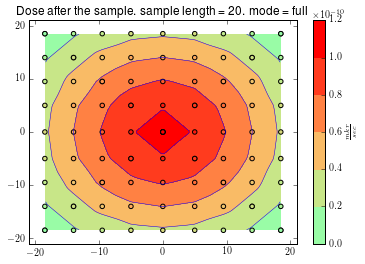

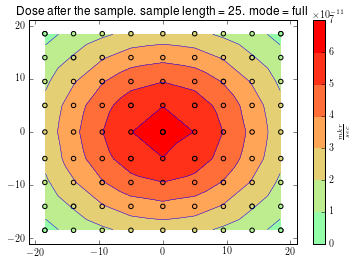

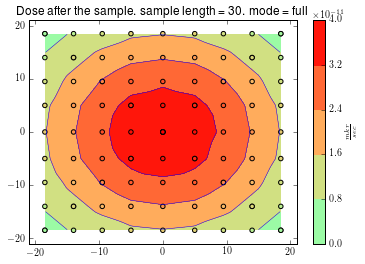

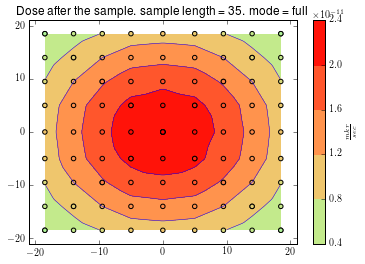

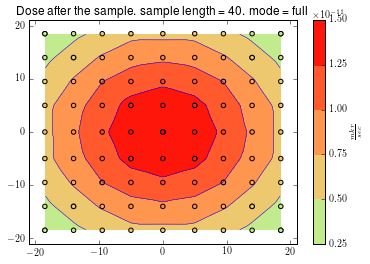

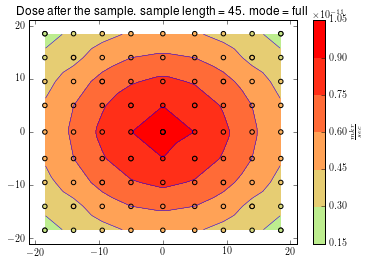

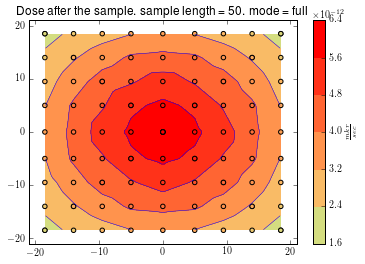

In [11]:
plot_dose_after_the_sample(names[:], FOLDER_TO_SAVE_IMAGES)

# Стенка

In [35]:
class Colors_generator:
    def __init__(self):
        self.colors = ['blue','green','red','cyan','magenta','yellow','black']
        self.i = -1
        
    def current(self):
        return self.colors[self.i]
    
    def get_next(self):
        self.i = (self.i + 1)%len(self.colors)
        return self.current()
    
def plot_dose_on_wall(files_names):
    #print files_names
    colors = Colors_generator()
    fig = plt.figure(figsize=(8,10))
    names = [os.path.split(x)[1] for x in files_names]
    prefixes = [x[:2] for x in names]
    assert len(set(prefixes)) == 1, "Files are in differend modes."
    mode = prefixes[0]
    ys = []
    for file_ in files_names:
        #print file_
        length = parse_file_name(file_, ['length'])[0]
        tallies = obr.construct_tallies(file_)
        x = []
        y = []
        for tally in tallies:
            if tally.x == 0 and tally.y < -97:
                x.append(tally.z)
                y.append(tally.get_dose()[0])
        x = np.array(x)
        y = np.array(y)
        indexes = np.argsort(x)
        x = x[indexes]
        y = y[indexes]
        #print x
        #print y
        if mode == 'PP':
            y = y/4.
        ys.append(y)
        plt.plot(x,y,marker='o', label=str(length), c=colors.get_next())
        plt.plot([100 + length,100 + length],[np.min(y),np.max(y)], '-.',c=colors.current())
        #break
    plt.plot([100,100],[np.min(ys),np.max(ys)], '--', c='blue')
    plt.legend(loc = 'best')
    plt.title('wall ' + mode)
    plt.savefig(pjoin(FOLDER_TO_SAVE_IMAGES, 'wall ' + mode + '.png'))
    
def plot_full_dose_on_wall(files_names):
    #print files_names
    colors = Colors_generator()
    fig = plt.figure(figsize=(8,10))
    mode = 'full'
    ys = []
    for file_p, file_n in files_names:
        #print file_
        length = parse_file_name(file_n, ['length'])[0]
        tallies_n = obr.construct_tallies(file_n)
        tallies_p = obr.construct_tallies(file_p)
        x = []
        y = []
        for i in range(len(tallies_n)):
            if tallies_n[i].x == 0 and tallies_n[i].y < -97:
                x.append(tallies_n[i].z)
                y.append(tallies_n[i].get_dose()[0] + tallies_p[i].get_dose()[0]/4)
        x = np.array(x)
        y = np.array(y)
        indexes = np.argsort(x)
        x = x[indexes]
        y = y[indexes]
        #print x
        #print y
        ys.append(y)
        plt.plot(x,y,marker='o', label=str(length), c=colors.get_next())
        plt.plot([100 + length,100 + length],[np.min(y),np.max(y)], '-.',c=colors.current())
        #break
    plt.plot([100,100],[np.min(ys),np.max(ys)], '--', c='blue')
    plt.legend(loc = 'best')
    plt.title('wall ' + mode)
    plt.savefig(pjoin(FOLDER_TO_SAVE_IMAGES, 'wall ' + mode + '.png'))

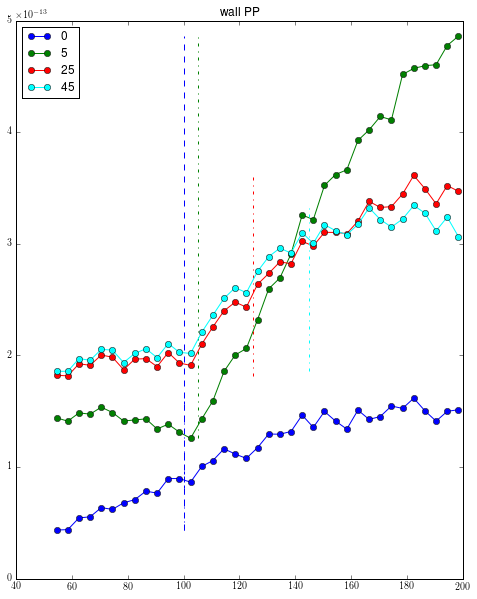

In [32]:
plot_dose_on_wall(names[:,1][[0,1,5,9]])

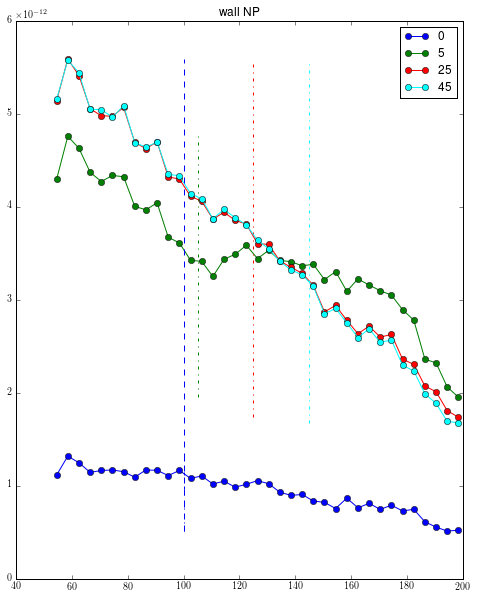

In [33]:
plot_dose_on_wall(names[:,0][[0,1,5,9]])

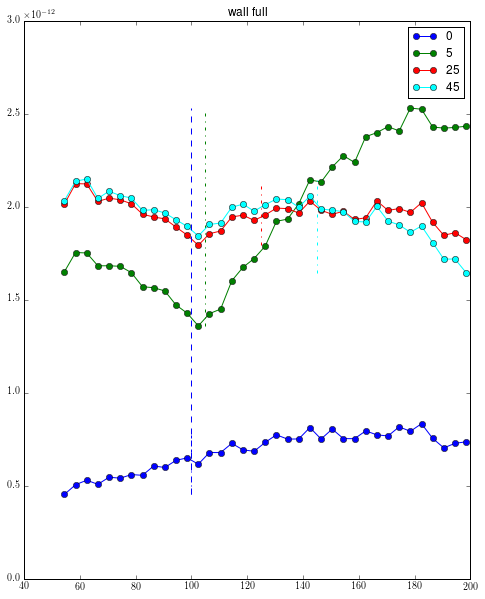

In [36]:
plot_full_dose_on_wall(names[[0,1,5,9]])

In [16]:
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output

def all_doses(file_, e, a):
    fig = plt.figure(figsize=(10,12))
    ax = fig.add_subplot(111, projection='3d')
    name = os.path.split(file_)[1]
    tallies = obr.construct_tallies(file_)
    x=[]
    y=[]
    z=[]
    doses = []
    mode = name[:2]
    if mode=='PP':
        etalon_tallies = obr.construct_tallies(pjoin(SOURCES_FOLDER,'PP0a'))
    for i in range(len(tallies)):
        x.append(tallies[i].x)
        z.append(tallies[i].z)
        y.append(tallies[i].y)
        if mode=='PP':
            doses.append((tallies[i].get_dose()[0] - etalon_tallies[i].get_dose()[0])/4.)
        else:
            doses.append(tallies[i].get_dose()[0])
    doses_n = doses/np.max(doses)
    #doses_n = doses_n
    z = np.array(z)
    sct = ax.scatter(x,y,z,c=doses_n,s=100*doses_n, cmap='jet')
    colbar = fig.colorbar(sct)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_xlim3d(-100, 100)
    ax.set_ylim3d(-100, 100)
    ax.set_zlim3d(0, 200)
    ax.set_title(mode + '  ' + name[2:-1])
    
    ax.azim = a
    ax.elev = e
    return fig

def all_doses_full(file_p, file_n, e, a):
    fig = plt.figure(figsize=(10,12))
    ax = fig.add_subplot(111, projection='3d')
    tallies_p = obr.construct_tallies(file_p)
    tallies_n = obr.construct_tallies(file_n)
    x=[]
    y=[]
    z=[]
    doses = []
    etalon_tallies = obr.construct_tallies(pjoin(SOURCES_FOLDER,'PP0a'))
    for i in range(len(tallies_p)):
        x.append(tallies_p[i].x)
        z.append(tallies_p[i].z)
        y.append(tallies_p[i].y)
        if tallies_p[i].z < 100 and abs(tallies_p[i].y) < 18:
            doses.append(tallies_n[i].get_dose()[0] + (tallies_p[i].get_dose()[0] - etalon_tallies[i].get_dose()[0])/4.)
        else:
            doses.append(tallies_n[i].get_dose()[0] + tallies_p[i].get_dose()[0]/4.)
    doses_n = doses/np.max(doses)
    #doses_n = doses_n
    z = np.array(z)
    sct = ax.scatter(x,y,z,c=doses_n,s=100*doses_n, cmap='jet')
    colbar = fig.colorbar(sct)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_xlim3d(-100, 100)
    ax.set_ylim3d(-100, 100)
    ax.set_zlim3d(0, 200)
    #ax.set_title("full" + '  ' + [2:-1])
    
    ax.azim = a
    ax.elev = e
    return fig

In [17]:
verify_folder_existence('__video1')
counter = 0
for e in range(-30,61,30):
    for a in range(0,360,3):
        name = str(counter).rjust(5,'0')+'.png'
        print '\r', name,
        fig = all_doses_full(pjoin(SOURCES_FOLDER,"PP5a"),pjoin(SOURCES_FOLDER,"NP5a"), e=e, a=a)
        #plt.show()
        fig.savefig('__video1/'+name)
        counter += 1
        fig.clear()
        clear_output(wait=True)